In [24]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [25]:
file_list

['../data/raw\\1к_2025-04-30_20-54.csv',
 '../data/raw\\1к_2025-05-07_20-28.csv',
 '../data/raw\\1к_2025-05-07_20-44.csv',
 '../data/raw\\1к_2025-05-14_20-38.csv',
 '../data/raw\\2к_2025-04-30_20-58.csv',
 '../data/raw\\2к_2025-05-07_20-28.csv',
 '../data/raw\\2к_2025-05-07_20-45.csv',
 '../data/raw\\2к_2025-05-14_20-41.csv',
 '../data/raw\\3к_2025-04-30_21-02.csv']

In [26]:
main_dataframe = pd.read_csv(file_list[0], delimiter=',')
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i], delimiter=',') 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [27]:
main_dataframe

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.00,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253252/,Москва,sale,flat,71,79,1,79.00,-1,0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
2,ID 130430577,homeowner,https://www.cian.ru/sale/flat/316847288/,Москва,sale,flat,3,17,1,35.50,-1,0,12000000,Некрасовка,Лавриненко,13к3,Некрасовка,Некрасовка
3,Доступный дом,real_estate_agent,https://www.cian.ru/sale/flat/316724491/,Москва,sale,flat,3,17,1,35.40,-1,0,13880000,NaN,Эдварда Грига,15,Потапово,NaN
4,Семен Гордый,realtor,https://www.cian.ru/sale/flat/286050252/,Москва,sale,flat,5,9,1,42.50,-1,0,7150000,NaN,Семена Гордого,12,Крёкшино,Ново-Никольское
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,ANWIN,real_estate_agent,https://www.cian.ru/sale/flat/316767637/,Москва,sale,flat,7,16,3,58.38,-1,0,35950000,Даниловский,Мустая Карима,12,Технопарк,WOW
1255,ГОРОБМЕН,real_estate_agent,https://www.cian.ru/sale/flat/315688477/,Москва,sale,flat,24,40,3,62.00,-1,0,36000000,Даниловский,бульвар Братьев Весниных,1,ЗИЛ,ЗИЛАРТ
1256,ОГРК,real_estate_agent,https://www.cian.ru/sale/flat/313044363/,Москва,sale,flat,10,22,3,79.80,-1,0,36100000,Лефортово,Крузенштерна,2,Площадь Ильича,Символ
1257,Isaev Estate,real_estate_agent,https://www.cian.ru/sale/flat/309432400/,Москва,sale,flat,5,30,3,70.00,-1,0,36500000,Хорошево-Мневники,Шелепихинская набережная,40к3,Шелепиха,Sydney City


In [28]:
new_dataframe = main_dataframe.drop_duplicates()

In [29]:
new_dataframe = main_dataframe[['total_meters', 'price', "floor", "floors_count", "rooms_count", "location", "district", "underground"]]

In [30]:
new_dataframe

,total_meters,price,floor,floors_count,rooms_count,location,district,underground
0,32.00,13590000,10,18,1,Москва,Останкинский,Ботанический сад
1,79.00,75000000,71,79,1,Москва,Пресненский,Москва-Сити
2,35.50,12000000,3,17,1,Москва,Некрасовка,Некрасовка
3,35.40,13880000,3,17,1,Москва,NaN,Потапово
4,42.50,7150000,5,9,1,Москва,NaN,Крёкшино
...,...,...,...,...,...,...,...,...
1254,58.38,35950000,7,16,3,Москва,Даниловский,Технопарк
1255,62.00,36000000,24,40,3,Москва,Даниловский,ЗИЛ
1256,79.80,36100000,10,22,3,Москва,Лефортово,Площадь Ильича
1257,70.00,36500000,5,30,3,Москва,Хорошево-Мневники,Шелепиха


<Axes: >

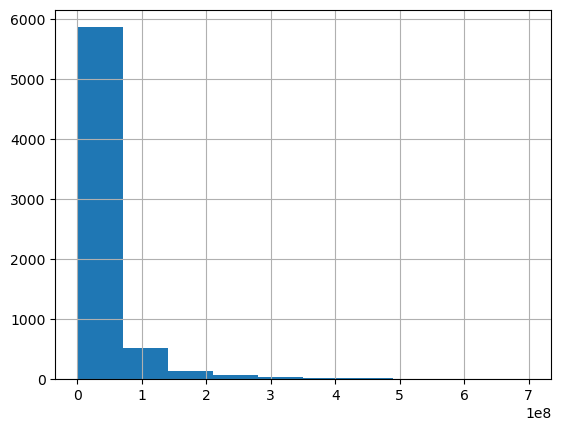

In [31]:
new_dataframe['price'].hist()

In [32]:
new_dataframe = new_dataframe.dropna()

In [35]:
mapping_dict = {
            'location': {val: idx+1 for idx, val in enumerate(new_dataframe['location'].unique())},
            'district': {val: idx+1 for idx, val in enumerate(new_dataframe['district'].unique())},
            'underground': {val: idx+1 for idx, val in enumerate(new_dataframe['underground'].unique())}
        }
for column in ['location', 'district', 'underground']:
    new_dataframe[column] = new_dataframe[column].map(mapping_dict[column])
new_dataframe

C:\Users\user\AppData\Local\Temp\ipykernel_15480\303194829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe[column] = new_dataframe[column].map(mapping_dict[column])


,total_meters,price,floor,floors_count,rooms_count,location,district,underground
0,32.00,13590000,10,18,1,1,1,1
1,79.00,75000000,71,79,1,1,1,1
2,35.50,12000000,3,17,1,1,1,1
5,37.50,7800000,3,19,1,1,1,1
6,54.80,40948000,8,13,1,1,1,1
...,...,...,...,...,...,...,...,...
1253,69.00,35490000,21,46,3,1,1,1
1254,58.38,35950000,7,16,3,1,1,1
1255,62.00,36000000,24,40,3,1,1,1
1256,79.80,36100000,10,22,3,1,1,1


In [22]:
print(new_dataframe.describe())  # Статистика без выбросов
print(new_dataframe.isnull().sum())  # Проверка на оставшиеся NaN

       total_meters         price        floor  floors_count  rooms_count
count   3903.000000  3.903000e+03  3903.000000   3903.000000  3903.000000
mean      64.606480  4.409697e+07     9.188317     17.843710     1.960799
std       36.343512  6.761763e+07     9.067074     13.931412     0.846950
min        8.300000  1.300000e+06     1.000000      1.000000    -1.000000
25%       39.000000  1.170000e+07     3.000000      9.000000     1.000000
50%       55.100000  2.150000e+07     7.000000     14.000000     2.000000
75%       77.050000  4.536000e+07    12.000000     22.000000     3.000000
max      495.000000  7.000000e+08    81.000000    117.000000     3.000000
total_meters    0
price           0
floor           0
floors_count    0
rooms_count     0
dtype: int64


In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['total_meters', 'price', 'floor', 'floors_count', 'rooms_count']:
    new_dataframe = remove_outliers(new_dataframe, col)

In [24]:
new_dataframe.count()

total_meters    3076
price           3076
floor           3076
floors_count    3076
rooms_count     3076
dtype: int64

In [25]:
new_dataframe.to_csv('..//data//cleaned_data.csv', index=False)